In [2]:
# %pip install mplcursors

import pandas as pd
from astropy.io import fits
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
import datetime
import aperphot_moving
from aperphot_moving import TargetLoc

from importlib import reload

from os.path import exists

In [136]:
# # read in images table

# imgs = pd.read_csv('img_master_spreadsheet.csv')

# imgs['timestamp'] = imgs['timestamp'].apply(parse)

# def _get_aligned_img_path(fp: str):
#     return str(Path('./aligned/').joinpath(Path(fp).name.rstrip('.fits') + '_affineremap.fits'))

# imgs['aligned_filepath'] = imgs['filepath'].apply(_get_aligned_img_path)
# imgs['ok'] = imgs['aligned_filepath'].apply(exists)

# okay = imgs['ok'] == True

# #imgs.sort_values('timestamp', inplace=True)

# imgs
# # PLEASE RUN THE FILTER CELL AFTER THIS (see above)

In [3]:
imgs = pd.DataFrame(
    columns=('aligned_filepath', 'timestamp', 'ok'),
    #dtype=(str, datetime, str)
)

def _get_time(fp:str):
    name = Path(fp).name.split('__')[0].lstrip('combined_')
    return parse(name)
    #return datetime.datetime.strptime(name, 'combined_%Y-%m-%dT%X.0000')




imgs['aligned_filepath'] = glob.glob(f"aligned/*.fits")

imgs['timestamp'] = imgs['aligned_filepath'].apply(_get_time)

imgs.sort_values('timestamp', inplace=True)

imgs['ok'] = True
okay = imgs['ok']

In [4]:
# FILTER CELL

night_1 = (imgs['timestamp'] >= parse('2022-11-11T05:51:00')) & (imgs['timestamp'] < parse('2022-11-12T00:00:00'))



night_2_group_1 = (
    (parse('2022-11-12T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-12T05:59:20'))
    )

night_2_group_2 = (
    (parse('2022-11-12T06:51:36') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-12T07:21:36'))
    )


# night_3 = (
#     (parse('2022-11-13T00:00:00') <= imgs['timestamp']) & 
#     (imgs['timestamp'] < parse('2022-11-14T00:00:00'))
#     )

night_3_group_1 = (
    (parse('2022-11-13T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-13T04:59:20'))
    )

night_3_group_2 = (
    (parse('2022-11-13T04:59:20') <= imgs['timestamp'])
    )

In [9]:
sum(night_1)

40

# Photometry

In [98]:
# click on image to print its coordinates and timestamp!
# MAKE SURE TO RUN pip install mplcursors
# use vmin and vmax to change image brightness
%matplotlib tk


aperphot_moving.get_coords_of_point(imgs.loc[night_2_group_2 & okay, 'aligned_filepath'], vmin=0, vmax=500)

TargetLoc(x=595.8000000000001, y=455.0999999999999, t='2022-11-12T06:51:36.0000')


In [20]:
# RELOAD aperphot_moving.py 

globals()['aperphot_moving'] = reload(aperphot_moving)
globals()['TargetLoc'] = aperphot_moving.TargetLoc

In [13]:
# NIGHT 1

%matplotlib tk

FWHM = 13

photometry_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay&night_1]['aligned_filepath'],

    start_object=TargetLoc(x=723.7147046501888, y=944.1470203183914, t='2022-11-11T06:14:00.0000'),

    end_object=TargetLoc(x=676.7723412773491, y=948.8662977890997, t='2022-11-11T06:01:00.0000'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False,

    reference_positions=[
        TargetLoc(620.9218422706329, 187.40594888981994),
        TargetLoc(885.0793838196438, 538.3439309608142)
    ],

    vmax=400
 
)

photometry_1

,target_subtracted_counts,timestamp,star_0_subtracted_counts,star_1_subtracted_counts,uncalibrated_target_mag,star_subtracted_counts_mean,uncalibrated_star_0_mag,uncalibrated_star_1_mag,uncalibrated_star_mag_mean,differential_counts,differential_mag
0,6863.972390,2022-11-11 05:51:00,346783.069963,4875.682694,-7.091439,175829.376329,-11.350145,-6.720089,-10.612729,-168965.403939,3.521290
1,7433.331398,2022-11-11 05:52:00,346411.313713,5827.460225,-7.177959,176119.386969,-11.348980,-6.913698,-10.614518,-168686.055571,3.436559
2,8830.720984,2022-11-11 05:53:00,350182.305205,4848.000100,-7.364990,177515.152653,-11.360735,-6.713907,-10.623089,-168684.431669,3.258098
3,8429.307791,2022-11-11 05:54:00,348512.988229,4624.550903,-7.314480,176568.769566,-11.355547,-6.662674,-10.617285,-168139.461776,3.302805
4,8640.493745,2022-11-11 05:55:00,351122.663253,4805.559641,-7.341346,177964.111447,-11.363647,-6.704360,-10.625831,-169323.617702,3.284485
5,7677.605458,2022-11-11 05:56:00,348079.446075,4762.627042,-7.213064,176421.036559,-11.354196,-6.694616,-10.616376,-168743.431101,3.403311
6,8081.010072,2022-11-11 05:57:00,348735.386553,4723.943223,-7.268664,176729.664888,-11.356240,-6.685762,-10.618274,-168648.654815,3.349610
7,7895.766598,2022-11-11 05:58:00,349541.306432,4526.783558,-7.243486,177034.044995,-11.358746,-6.639474,-10.620142,-169138.278397,3.376656
8,8475.540750,2022-11-11 05:59:00,350914.937498,4269.865951,-7.320419,177592.401724,-11.363005,-6.576036,-10.623561,-169116.860974,3.303142
9,8535.668179,2022-11-11 06:00:00,349538.943757,3884.535488,-7.328094,176711.739622,-11.358739,-6.473348,-10.618164,-168176.071443,3.290070


In [58]:
# Night 2 group 1

%matplotlib tk

FWHM = 10

photometry_2_group_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay & night_2_group_1]['aligned_filepath'],

    start_object=TargetLoc(x=651, y=983, t='2022-11-12T02:49:48'),

    end_object= TargetLoc(x=1088, y=938, t='2022-11-12T04:51:31'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False,

    reference_positions=[
        TargetLoc(1009.8564266803644, 511.4699819071131),
        #TargetLoc(1445.0230224321135, 583.3006409175242) # THIS IS A BAD REFERENCE
    ]

)

photometry_2_group_1

,target_subtracted_counts,timestamp,star_0_subtracted_counts,uncalibrated_target_mag,star_subtracted_counts_mean,uncalibrated_star_0_mag,uncalibrated_star_mag_mean,differential_counts,differential_mag
0,5517.041790,2022-11-12 02:41:48,4478.874133,-6.854266,4478.874133,-6.627922,-6.627922,1038.167657,-0.226344
1,6272.808578,2022-11-12 02:42:48,4533.321955,-6.993655,4533.321955,-6.641041,-6.641041,1739.486622,-0.352614
2,6619.290274,2022-11-12 02:43:48,4681.491525,-7.052029,4681.491525,-6.675961,-6.675961,1937.798749,-0.376068
3,5336.139017,2022-11-12 02:44:48,4228.120030,-6.818068,4228.120030,-6.565368,-6.565368,1108.018987,-0.252700
4,5287.917723,2022-11-12 02:45:48,4714.938704,-6.808212,4714.938704,-6.683690,-6.683690,572.979019,-0.124522
...,...,...,...,...,...,...,...,...,...
114,7920.749022,2022-11-12 04:50:31,5604.978033,-7.246916,5604.978033,-6.871435,-6.871435,2315.770988,-0.375481
115,8124.584330,2022-11-12 04:51:31,5242.377505,-7.274503,5242.377505,-6.798821,-6.798821,2882.206825,-0.475682
116,7570.994878,2022-11-12 04:52:31,5531.636063,-7.197882,5531.636063,-6.857134,-6.857134,2039.358816,-0.340748
117,6947.522039,2022-11-12 04:53:31,5183.626836,-7.104575,5183.626836,-6.786584,-6.786584,1763.895203,-0.317991


In [56]:
# Night 2 group 2

%matplotlib tk

FWHM = 10

photometry_2_group_2 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay & night_2_group_2]['aligned_filepath'],

    start_object = TargetLoc(x=413.19010416666663, y=629.090625, t='2022-11-12T06:51:36.0000'),
    end_object = TargetLoc(x=517.3820833333334, y=615.0904166666666, t='2022-11-12T07:20:36.0000'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False, # in the dry run, press 'b' and 'n' to cycle through the images

    reference_positions=[
        TargetLoc(x=594.125, y=452.19666666666666,),
        TargetLoc(x=1235.1614583333333, y=679.7175, ),
        #TargetLoc(x=1494.605, y=740.3525,)], # THIS IS A BAD REFERENCE STAR
    ],
    
    vmin = 0,
    vmax = 600 # corrects brightness in plot

)

photometry_2_group_2

,target_subtracted_counts,timestamp,star_0_subtracted_counts,star_1_subtracted_counts,uncalibrated_target_mag,star_subtracted_counts_mean,uncalibrated_star_0_mag,uncalibrated_star_1_mag,uncalibrated_star_mag_mean,differential_counts,differential_mag
0,2911.018279,2022-11-12 06:51:36,91641.488119,32975.312774,-6.160112,62308.400447,-9.905230,-8.795472,-9.486367,-59397.382167,3.326254
1,4075.176698,2022-11-12 06:52:36,91164.749866,33994.932567,-6.525366,62579.841216,-9.899567,-8.828535,-9.491086,-58504.664519,2.965720
2,5015.237273,2022-11-12 06:53:36,91147.500287,34256.050389,-6.750729,62701.775338,-9.899362,-8.836843,-9.493200,-57686.538065,2.742471
3,3971.895577,2022-11-12 06:54:36,90914.395633,33636.374261,-6.497495,62275.384947,-9.896582,-8.817023,-9.485791,-58303.489370,2.988296
4,3215.183377,2022-11-12 06:55:36,91298.812914,33911.377481,-6.268014,62605.095198,-9.901163,-8.825864,-9.491524,-59389.911820,3.223510
5,3412.560615,2022-11-12 06:56:36,90469.148441,34195.498940,-6.332701,62332.323690,-9.891251,-8.834922,-9.486783,-58919.763075,3.154082
6,4448.085076,2022-11-12 06:57:36,89648.506008,34045.528525,-6.620433,61847.017267,-9.881358,-8.830150,-9.478297,-57398.932191,2.857864
7,3096.393388,2022-11-12 06:58:36,89779.533158,33451.770446,-6.227140,61615.651802,-9.882943,-8.811048,-9.474228,-58519.258414,3.247087
8,4261.484531,2022-11-12 06:59:36,90337.409744,34150.617464,-6.573902,62244.013604,-9.889669,-8.833496,-9.485244,-57982.529073,2.911342
9,3428.939110,2022-11-12 07:00:36,90819.729203,33628.830661,-6.337899,62224.279932,-9.895451,-8.816779,-9.484900,-58795.340822,3.147000


In [40]:
# Night 3

#1211.797141170518, 858.9736043177603, '2022-11-13T06:35:57.0000'

#617.4767807949628, 932.9911452184181, '2022-11-13T03:51:33.0000'

%matplotlib tk

FWHM = 17

photometry_3_group_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[night_3_group_1]['aligned_filepath'],

    start_object= TargetLoc(x=343.90791666666667, y=829.6858333333333, t='2022-11-13T02:53:46'),

    end_object = TargetLoc(x=622.2231250000001, y=788.76, t='2022-11-13T04:11:53'), 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(x=133.19053117782914, y=389.4307159353348, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),
        TargetLoc(x=446.9919168591224, y=1302.9826789838337, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),
        TargetLoc(x=532.405311778291, y=1186.0034642032333, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),

    ]

)

photometry_3_group_1

/Users/student/anaconda3/envs/astroconda4/lib/python3.8/site-packages/mplcursors/_pick_info.py:162: UserWarning: Pick support for Circle is missing.
  warnings.warn(f"Pick support for {type(artist).__name__} is missing.")


TargetLoc(x=569.0, y=877.1999999999999, t='2022-11-13T03:44:33')
TargetLoc(x=666.15, y=850.4, t='2022-11-13T04:06:53')
TargetLoc(x=461.80000000000007, y=800.15, t='2022-11-13T03:45:33')
TargetLoc(x=625.95, y=770.0, t='2022-11-13T04:03:53')
TargetLoc(x=709.7, y=920.75, t='2022-11-13T03:58:53')
TargetLoc(x=709.7, y=920.75, t='2022-11-13T04:00:53')
TargetLoc(x=723.1, y=981.05, t='2022-11-13T04:00:53')


DryRunDone: #not_an_error

In [53]:
# Night 3 group 2 -  BAD

#1211.797141170518, 858.9736043177603, '2022-11-13T06:35:57.0000'

#617.4767807949628, 932.9911452184181, '2022-11-13T03:51:33.0000'

%matplotlib tk

FWHM = 17

photometry_3_group_2 = aperphot_moving.do_photometry_with_timestamps(
    imgs[night_3_group_2]['aligned_filepath'],

    start_object=TargetLoc(x=1043.736875, y=826.7127083333334, t='2022-11-13T06:05:57'),
    end_object=TargetLoc(x=1115.05, y=816.9, t='2022-11-13T06:24:57')
, 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(x=455.1, y=1399.8, t='2022-11-13T06:03:57'),
        TargetLoc(x=542.2, y=1279.2, t='2022-11-13T06:03:57'),
    ],

    vmax=255,
    vmin=200

)

photometry_3_group_2

# this seems not viable!

DryRunDone: #not_an_error

In [35]:
# #photometry_3.to_csv('photometry_3.csv')

# photometry_3 = pd.read_csv('photometry_3.csv')
# photometry_3['timestamp'] = photometry_3['timestamp'].apply(parse)

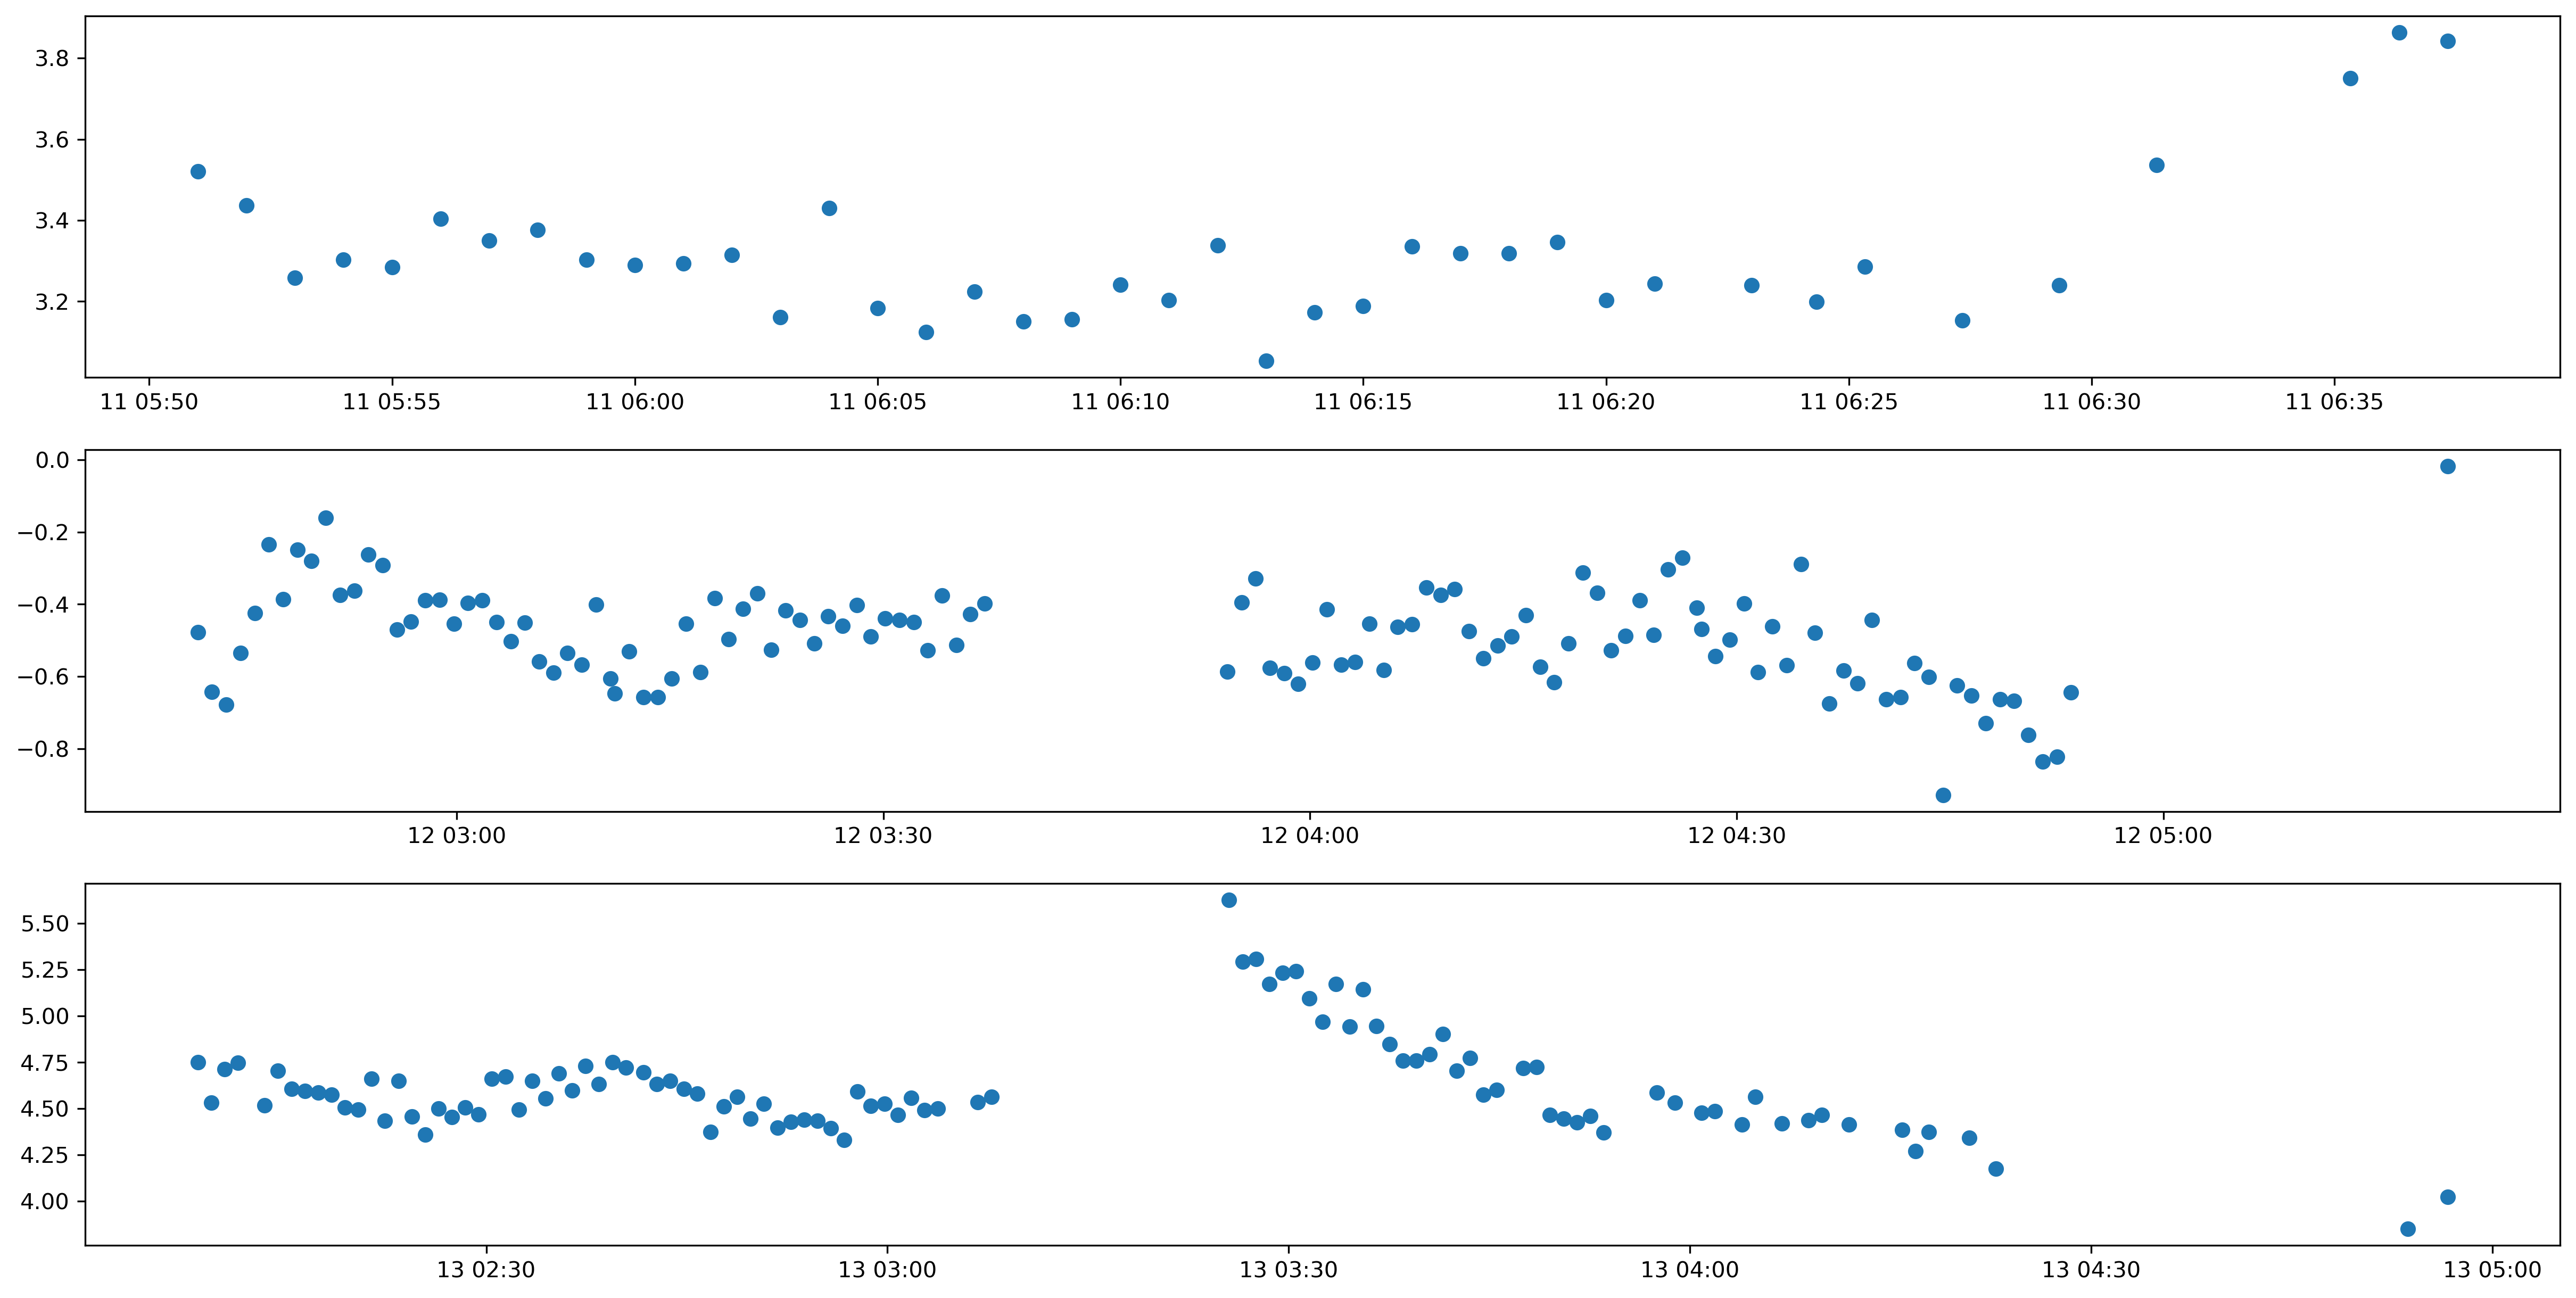

In [38]:
%matplotlib inline
# does not include photometry group 2 night 2
data = photometry_3_group_1

fig, axes = plt.subplots(3)

fig.set_dpi(300)
fig.set_figheight(10)
fig.set_figwidth(20)

for data, ax in zip((photometry_1, photometry_2_group_1, photometry_3_group_1), axes):
    ax.scatter(data['timestamp'], data['differential_mag'])


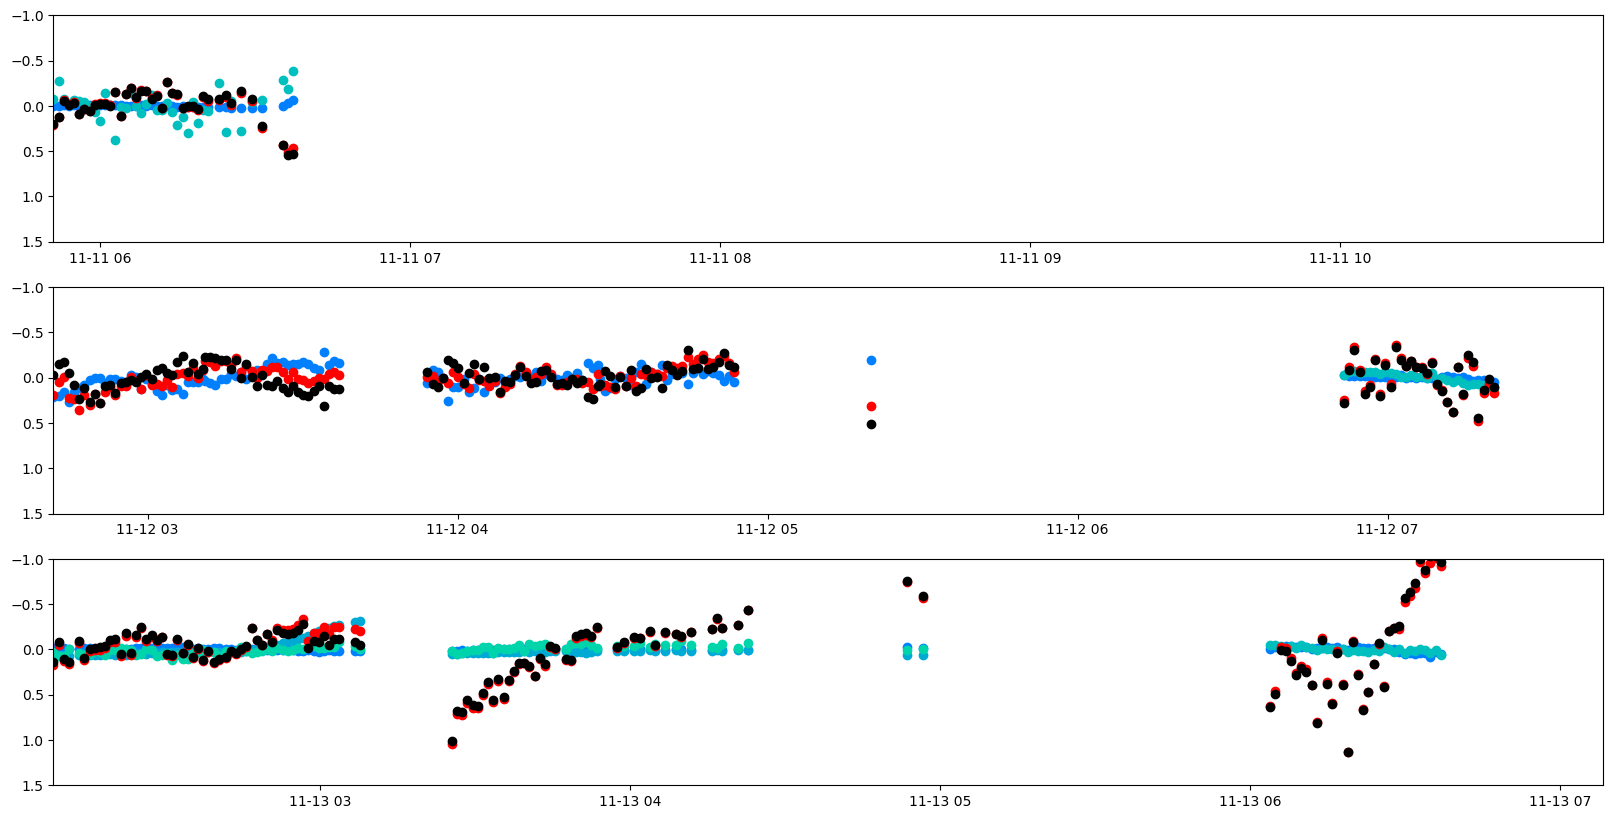

In [59]:
%matplotlib inline


fig, axes = plt.subplots(3)
fig.set_figheight(10)
fig.set_figwidth(20)

for data, ax_num in (photometry_1, 0), (photometry_2_group_1, 1), (photometry_2_group_2, 1), (photometry_3_group_1, 2), (photometry_3_group_2, 2):
    ax = axes[ax_num]
    # for y_name, color in ('uncalibrated_star_mag', 'cyan'), ('uncalibrated_target_mag', 'black'), ('differential_mag', 'red'):

    
    # count ref stars
    for i in range(10000000):
        if (y_name := f"uncalibrated_star_{i}_mag") not in data.columns:
            n = i
            break
    
    bg_star_colors = [(0, 0.5 + g/2/n, 1 - g/2/n) for g in range(n)]

    for i in range(n):
        y_name = f"uncalibrated_star_{i}_mag"
        ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color=bg_star_colors[i])

    
    
    y_name = 'uncalibrated_target_mag'
    ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color='red')

    y_name = 'differential_mag'
    ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color='black')

    ax.set_ylim((-1, 1.5))

for data, ax in zip([photometry_1, photometry_2_group_1, photometry_3_group_1], axes):
        t_0 = min(data['timestamp'])
        ax.set_xlim((t_0, t_0 + timedelta(hours=5)))
        
        ax.invert_yaxis()
    # ax.scatter(data['timestamp'],data['uncalibrated_star_mag'])
    # ax.scatter(data['timestamp'],data['differential_mag'])


# To zoom in/out you can set the ylimits:
#plt.ylim(18,10)


In [127]:
%matplotlib tk
aperphot_moving.get_coords_of_point(glob.glob('processed/*13T*.fits'))

TargetLoc(x=106.69999999999999, y=652.75, t='2022-11-13T06:31:57.0000')
TargetLoc(x=207.2, y=810.1999999999999, t='2022-11-13T06:31:57.0000')
TargetLoc(x=297.65, y=595.8, t='2022-11-13T06:10:57.0000')
TargetLoc(x=321.1, y=659.4499999999999, t='2022-11-13T06:10:57.0000')
